<a href="https://colab.research.google.com/github/duongnghiephuy/Student-Project/blob/master/visualizing_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import models
from google.colab import drive

drive.mount('/content/gdrive')

train_dir="/content/gdrive/My Drive/Practice/data/small_data/train"
validation_dir="/content/gdrive/My Drive/Practice/data/small_data/validation"
test_dir="/content/gdrive/My Drive/Practice/data/small_data/test"


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


**The convolutional network learns a hierarchy of representations to distinguish images.**


Intuitively, it will learn to detect edges, contourf before detecting specific features such as eyes, noses.

To visualize the feature map of the convolutional layer, we make use of the naive model trained previously.

In [2]:
model=models.load_model( "/content/gdrive/My Drive/Practice/cats_vs_dogs_v2.h5")
model.summary()












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 17, 17, 128)       0         
____________

The image is turned into tensor and rescaled before the model predicts its class.

In [0]:
img_path="/content/gdrive/My Drive/Practice/data/small_data/test/cats/cat.1944.jpg"

from keras.preprocessing import image
import numpy as np

img=image.load_img(img_path,target_size=(150,150))
img_tensor=image.img_to_array(img)
img_tensor=np.reshape(img_tensor,(1,)+img_tensor.shape)
img_tensor /= 255.0
print(img_tensor.shape)


(1, 150, 150, 3)


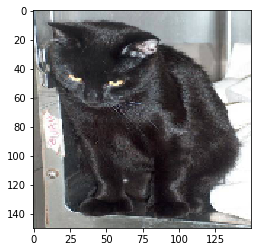

In [0]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])


This is the original image of the cat.

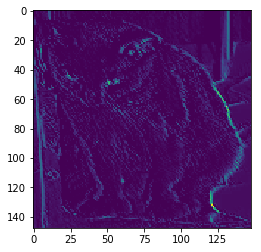

In [0]:
from keras import models

layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model=models.Model(inputs=model.input,outputs=layer_outputs)

result=activation_model.predict(img_tensor)
first_layer_activation=result[0]

plt.figure()
plt.imshow(first_layer_activation[0,:,:,0])





The first convolutional layer outputs feature map (148,148,32).

We choose to visualize the first filter which is an image of size(148,148)

**We clearly see that this layer detects the edges of the cat image.**

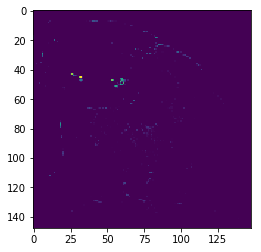

In [0]:
plt.figure(26)
plt.imshow(first_layer_activation[0,:,:,26])


**The 26th filter detects the eyes in image**.

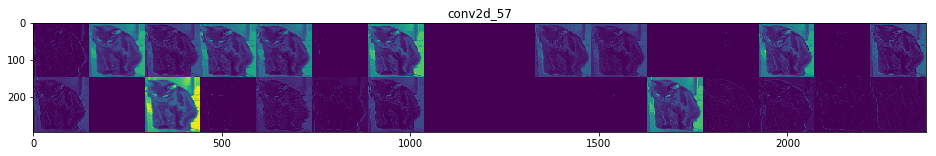

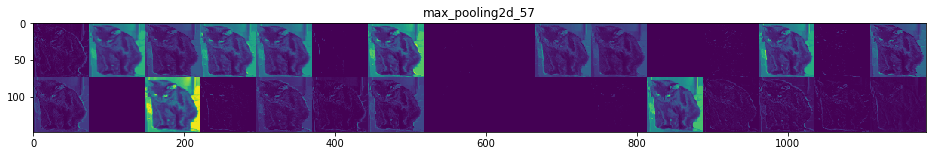

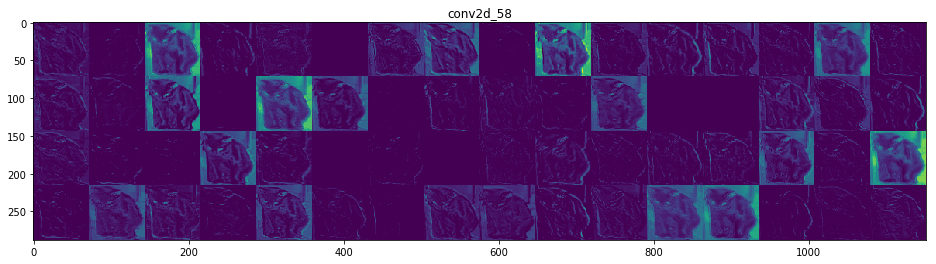

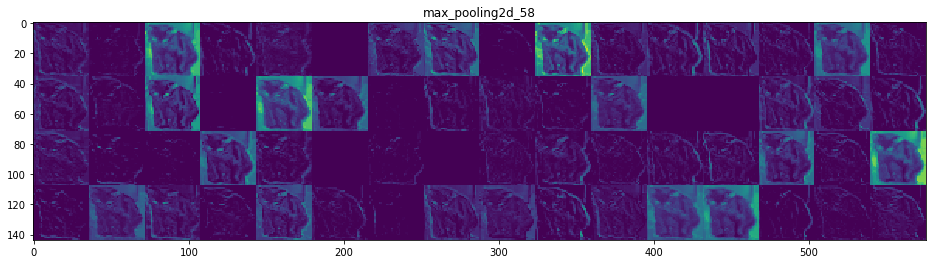

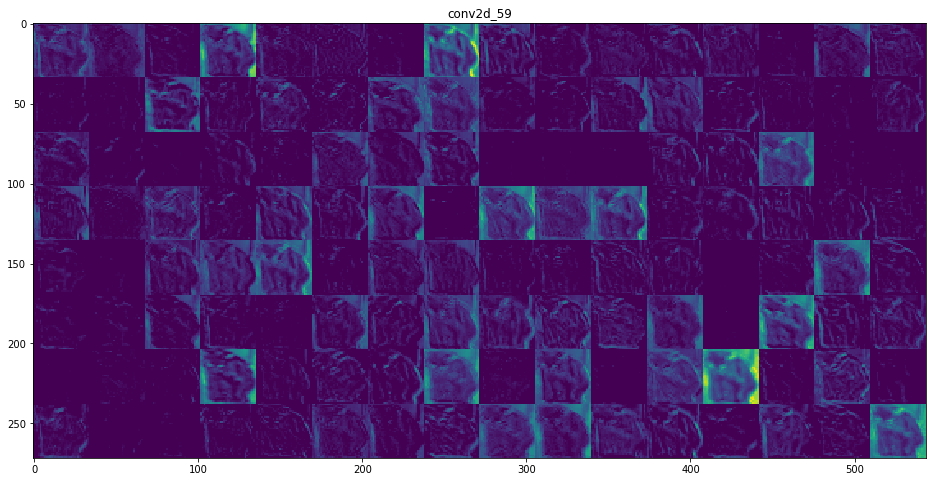

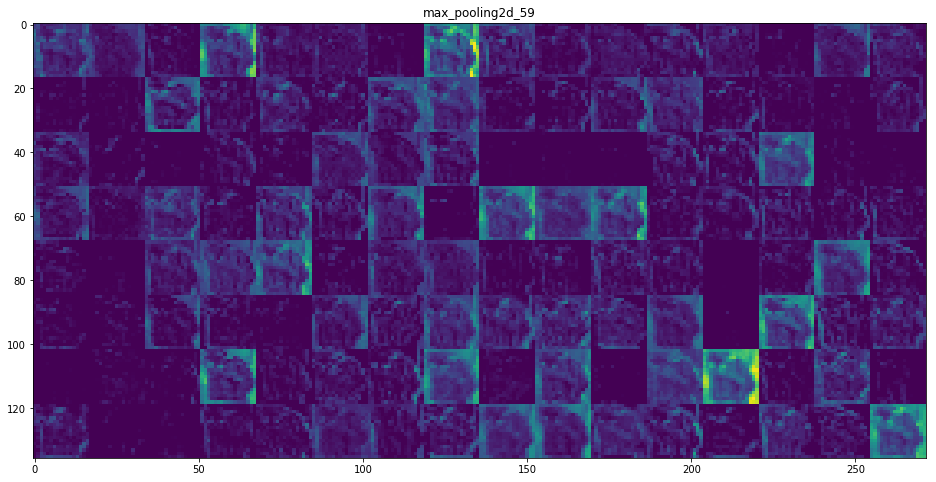

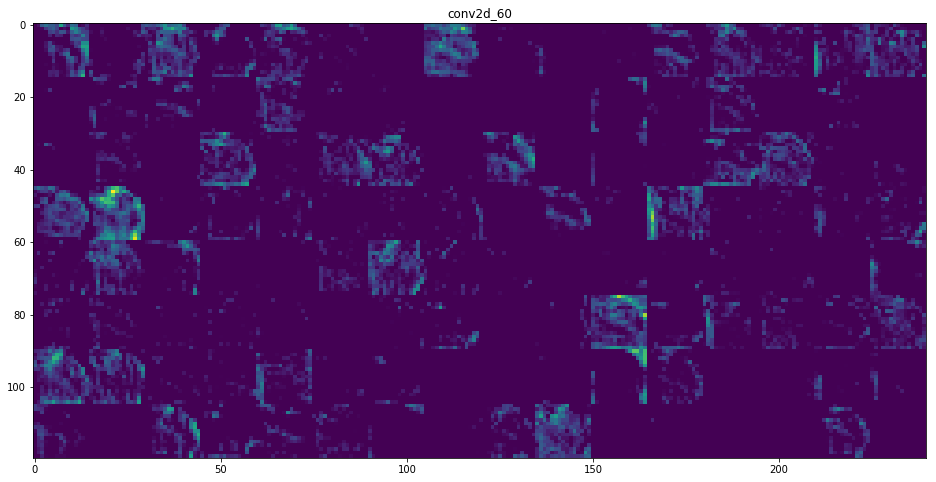

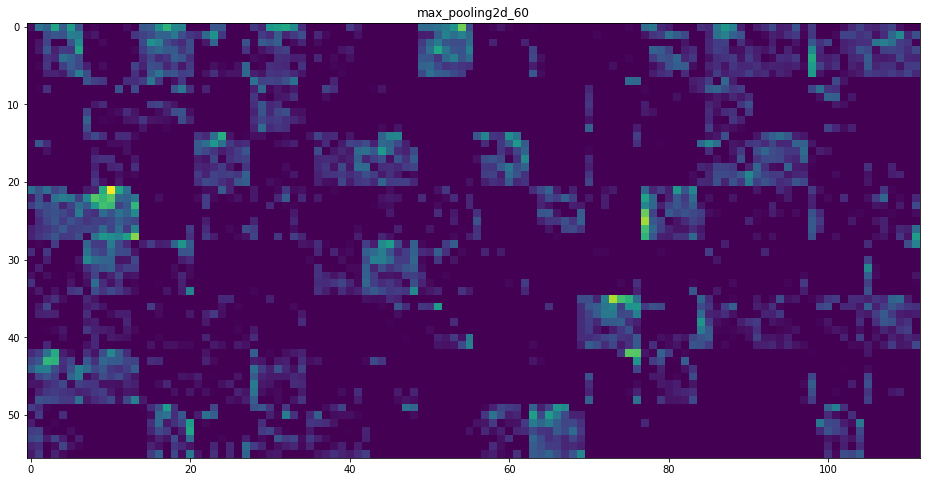

In [0]:
layers_name=[]
for layer in model.layers[:8]:
  layers_name.append(layer.name)
num_cols=16
for layer_name,layer_activation in zip(layers_name,result):
  
  size=layer_activation.shape[1]
  num_rows=layer_activation.shape[-1]//num_cols
  display_grid=np.zeros((size*num_rows,size*num_cols))
  for row in range(num_rows):
    for col in range(num_cols):
      filter_image=layer_activation[0,:,:,col+num_cols*row]
      filter_image=np.clip(filter_image,0,255)
      display_grid[row*size:(row+1)*size,col*size:size*(col+1)]=filter_image
  scale=1.0/size
  plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid,aspect="auto")



**We plot the feature map of each Convolutional Layers and MaxPooling Layers.**

As we go upper, the feature map becomes more arbitrary and hard to understand.
The model gradually captures highly conceptual features in image.

**Another way to visualize feature map is to display heat map.**

In other words, we highlight the pixels,the parts of image that contribute significantly to the prediction of the model.




In [3]:
from keras.applications import vgg16

model=vgg16.VGG16(weights="imagenet")
model.summary()


553467904/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

The imagenet trained model is imported. 
For a data point input, it outputs a 1000D vector of probability of 1000 classes.



In [27]:
from keras.preprocessing import image
import numpy as np
img_path="/content/gdrive/My Drive/Practice/data/small_data/test/dogs/dog.1702.jpg"
img=image.load_img(img_path,target_size=(224,224))
tensor=image.img_to_array(img)
tensor=np.expand_dims(tensor,axis=0)
tensor=vgg16.preprocess_input(tensor)

preds=model.predict(tensor)
print("Prediction:",vgg16.decode_predictions(preds,top=5))
print(preds.argmax())



Prediction: [[('n02109525', 'Saint_Bernard', 0.9911459), ('n02108089', 'boxer', 0.0044186283), ('n02108422', 'bull_mastiff', 0.0009300415), ('n02107574', 'Greater_Swiss_Mountain_dog', 0.0006683491), ('n02111500', 'Great_Pyrenees', 0.00028325306)]]
247


**The prediction of this dog image is 99% Saint_Bernard dog.**
We investigate the feature map of size (14,14,512) of the last Convolutional Layer. 

The optimization algorithm RMSprop implements gradient descent to maximize the maximum likelihood, therefore, we can get the gradient of the maximum likelihood with respect to each pixel of that feature map (14,14,512). The larger the gradient, the more it contributes to the classification. 

In this code, we use the mean gradient instead and finally heatmap=the mean of (all filters times mean gradient)

(14, 14, 512)


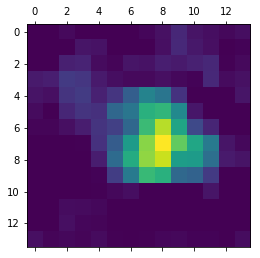

In [51]:
from keras import backend as K 
import matplotlib.pyplot as plt
dog=model.output[:,247]
conv_layer=model.get_layer(name="block5_conv3")
gradients=K.gradients(dog,conv_layer.output)[0]

mean_gradients=K.mean(gradients,axis=(0,1,2))
op=K.function([model.input],[mean_gradients,conv_layer.output])

mean_gradients_val,conv_layer_output_val=op([tensor])
conv_layer_output_val=np.reshape(conv_layer_output_val,(14,14,512))
print(conv_layer_output_val.shape)
for i in range(512):
  conv_layer_output_val[:,:,i] *= mean_gradients_val[i]
heatmap=np.mean(conv_layer_output_val,axis=-1)

heatmap=np.maximum(heatmap,0)
heatmap/=np.max(heatmap)
plt.matshow(heatmap)



In [55]:

import cv2
img=cv2.imread(img_path)

heatmap=cv2.resize(heatmap,(img.shape[1],img.shape[0]))
heatmap=np.uint8(255*heatmap)
heatmap=cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
fused_img=heatmap*0.5 + img
cv2.imwrite("/content/gdrive/My Drive/Practice/heatmap.jpg",fused_img)




True

We apply ColorMap on the heatmap and fuse it with the original image. 

The model looks at the head, eyes and ears to classify.



![alt text](https://drive.google.com/uc?id=1-sXnD-wOjhJ33sYA2-2s8iDd7GWwy1Op)





